# Data Understanding and Visualization
#### with Pandas, NumPy, and Matplotlib

- Pandas
    - Powerful data manipulation tool. Built for speed and efficiency.
    - Lets you handle data with columns and rows.
- NumPy
    - Extremely fast mathematical library. Most scientific computing python packages are built ontop of NumPy
    - Super fast N-Dimensional Arrays
- Matplotlib
    - Graphical visualizations of array data, either in pandas, numpy, or list format.
    - Third party package seaborn offers more appealing API and color schemes.

In this notebook, we'll install all of the packages at once, then run through NumPy, Pandas, and Matplotlib sections. You'll need to fill in some code, marked by #TODO.

# Installation

Run the following cell to install all four packages at once. If this does not work on your system, you can manually use the command line to install these packages.

In [9]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# NumPy

In this section, we'll work wtih NumPy arrays and understand how how we can work with this data structure

In [17]:
import numpy as np

## N-Dimensional Arrays
Run the two cells below. Observe how the first cell is a plain python list. The output of the second cell is a np.array with the same values. There is no "shape" to the plain python list. However, we can call .shape on any np.array to get the shape of that array. (Remember, arrays are N-Dimensional!)

In [20]:
[1,2,3]

[1, 2, 3]

In [22]:
arr1 = np.array([1,2,3])
arr1

array([1, 2, 3])

In [24]:
arr1.shape

(3,)

Notice how a 1 dimensional array's shape has only one length followed by a trailing comma. This tells us that the first dimension's length is 3. Why is it not (3,1)? In the case of an array with shape (3,1), this would tell us it's a *2*-dimensional array with the first dimension's length is 3 and the second's is 1. This may seem like the same kind of array, but it is distinctly different -- especially when we get to Pandas!

In [27]:
arr2 = np.array([
    [1,2,3],
    [4,5,6]
])
arr2

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
#TODO: Write a line of code below to output the shape of the arr2 array. Expected output is (2,3)
arr2.shape

(2, 3)

In [31]:
#TODO: Write some code to create an np.array that has the shape (3,3).
arr3 = np.array([
    [3,4,5],
    [6,2,7],
    [9,5,7]
])
arr3.shape

(3, 3)

## Utility properties
Using arr1 and arr2 from the previous cells, let's explore some utility properties that numpy offers.

In [34]:
# Finding the number of dimensions
arr1.ndim

1

In [36]:
arr2.ndim

2

Notice that the .ndim is the same if we took the length of shape:

In [39]:
len(arr1.shape)

1

In [41]:
len(arr2.shape)

2

In [43]:
# Finding what kind of number is stored
arr1.dtype

dtype('int64')

Notice that this means we can't have floats and ints in the same array. If we try to do that, our ints will be converted into floats.

In [46]:
np.array([1.4, 1])

array([1.4, 1. ])

# Pandas

In [49]:
import pandas as pd

Most of Pandas' strength comes from DataFrames, which are like 2 dimensional arrays. There is also Pandas Series, which are like 1-dimensional arrays. Unlike NumPy, they can store objects (such as strings)

In [52]:
animals = pd.Series(['dog','cat','frog','bee'])
animals

0     dog
1     cat
2    frog
3     bee
dtype: object

In [54]:
colors = pd.Series(['brown', 'black', 'green', 'yellow'])
colors

0     brown
1     black
2     green
3    yellow
dtype: object

In [56]:
animal_df = pd.DataFrame({
    "animal": animals,
    "color": colors
})
animal_df

,animal,color
0,dog,brown
1,cat,black
2,frog,green
3,bee,yellow


In [58]:
#TODO: Create your own dataframe! It can be anything, as long as it has at least 2 columns and 3 rows.
movies = pd.Series(["Deadpool", "Shawshank Redemption", "Interstellar"])
ratings= pd.Series([8.2, 9, 9.1])

movies_ratings_df = pd.DataFrame({
        "movies": movies,
        "ratings": ratings
})
movies_ratings_df 

,movies,ratings
0,Deadpool,8.2
1,Shawshank Redemption,9.0
2,Interstellar,9.1


## Working with data!
In this section, we'll be using the two csv files from canvas:
- honeyproduction.csv
- honeyproduction_withnulls.csv

Download the files from canvas and place them in the same folder as this notebook.

In [62]:
honey_df = pd.read_csv("datasets/honeyproduction.csv")

Now let's take a look at the first five rows. We can use .head() to display the "head" 

In [65]:
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### DataFrame utility properties!

In [68]:
# get the data type for each column.
honey_df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

Notice the similarity in how these are presented compared to NumPy dtypes!

In [71]:
# get a list-like object (Index) of the columns. This is an iterable object.
honey_df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

Now, try to get the shape of the DataFrame. Think of how shapes work in NumPy.

In [74]:
#TODO get shape of honey_df. Expected output: (626, 8)
honey_df.shape

(626, 8)

We can also use `.describe()` to see some statistical information on the numerical columns.

In [77]:
honey_df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


### Slicing DataFrames
Let's practice slicing the DataFrame to precicely access certain parts of the data.

In [80]:
# get the column with state information
honey_df['state']

0      AL
1      AZ
2      AR
3      CA
4      CO
       ..
621    VA
622    WA
623    WV
624    WI
625    WY
Name: state, Length: 626, dtype: object

In [ ]:
# get the columns with state, priceperlb, and year information
honey_df[['state', 'priceperlb', 'year']]

**CHECKPOINT!**
Notice how the syntax is different for accessing one column compared to multiple. Also note how when accessing one column, we get a Series object. Contrast this to multiple columns, where we get a DataFrame that is a subset of `honey_df`

But what about rows?

In [1]:
# let's take a look at our DataFrame for reference.
honey_df.head()

NameError: name 'honey_df' is not defined

In [3]:
# if we want to LOCate the row with the label 0:
honey_df.loc[0]

NameError: name 'honey_df' is not defined

In [5]:
# if we want to locate the row based on position (not necessarily the labeled index)
honey_df.iloc[2]

NameError: name 'honey_df' is not defined

In [7]:
# we can do ranges as well. they work like normal python slicing syntax
honey_df.iloc[1:4]

NameError: name 'honey_df' is not defined

In [ ]:
# just to prove the point, we can even get the first few even rows:
honey_df.iloc[0:11:2]

### Filtering DataFrames with conditionals

In [ ]:
# filter the honey_df DataFrame so that we have all rows from NC
honey_df[honey_df['state'] == 'NC']

This syntax is confusing, but let's break it down:

Here's the column of `honey_df` that has state data

In [ ]:
honey_df['state']

We can use a conditional to return a series of boolean values, which indicate whether that conditional was evaluated as true or false for a given row.

In [ ]:
honey_df['state'] == 'NC'

Bringing it together, we get the rows of honey_df where our conditional was true!

In [ ]:
honey_df[honey_df['state'] == 'NC']

In [ ]:
#TODO write your own conditional to filter a subset of the DataFrame.
#It can be anything EXCEPT filtering by state. Hint: Try year!


## Working with missing data/nulls!
Now, real world data is never 'clean'. We should practice on some data that has null values. Let's re-assign `honey_df` to a DataFrame with data from `honeyproduction_withnulls.csv`

In [37]:
honey_df = pd.read_csv('datasets/honeyproduction_withnulls.csv')

In [38]:
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71.0,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60.0,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65.0,NaN,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83.0,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72.0,1944000.0,1594000.0,NaN,1361000.0,1998


We can see some nulls: specifically under totalprod and priceperlb. These are marked as NaN, as that's how NumPy handles non-existant data. Let's see how many nulls we have:

In [39]:
honey_df.isna().sum()

state          0
numcol         2
yieldpercol    2
totalprod      5
stocks         5
priceperlb     4
prodvalue      3
year           0
dtype: int64

This returns the sum of the true values from `isna()`, which gives us a ccount of all nulls in our DataFrame, by column. For `totalprod`, let's just full the null values with the mean. This can work since there's very few nulls.

In [46]:
honey_df['totalprod'] = honey_df['totalprod'].fillna(
    honey_df['totalprod'].mean()
)

In [47]:
honey_df.isna().sum()

state          0
numcol         2
yieldpercol    2
totalprod      0
stocks         5
priceperlb     0
prodvalue      3
year           0
dtype: int64

In [48]:
#TODO do the same for priceperlb
honey_df['priceperlb']= honey_df['priceperlb'].fillna(
    honey_df['priceperlb'].mean()
)
# honey_df.isna().sum()

Now we're going to just drop the rows that have null values. If you're certain that you only have a few null datapoints and that the presence of null values have no impact on your dataset, this can be a good approach. Let's see the length of `honey_df` before and after as well.

In [49]:
len(honey_df)

626

In [50]:
honey_df = honey_df.dropna(axis=0)

In [55]:
len(honey_df)

615

Only dropping 11 rows is great for this dataset!

## Adding new columns

Let's say we need to add the price per ounce as well. Here's how we can add another column to our DataFrame.

In [56]:
honey_df['priceperoz'] = honey_df['priceperlb'] / 16

/var/folders/67/h48x2gnj2gb8ph6cgn5k4kdh0000gn/T/ipykernel_8509/884247228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  honey_df['priceperoz'] = honey_df['priceperlb'] / 16


In [57]:
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,priceperoz
0,AL,16000.0,71.0,1.136000e+06,159000.0,0.720000,818000.0,1998,0.045000
1,AZ,55000.0,60.0,3.300000e+06,1485000.0,0.640000,2112000.0,1998,0.040000
2,AR,53000.0,65.0,4.133610e+06,1688000.0,0.590000,2033000.0,1998,0.036875
3,CA,450000.0,83.0,3.735000e+07,12326000.0,0.620000,23157000.0,1998,0.038750
4,CO,27000.0,72.0,1.944000e+06,1594000.0,1.411994,1361000.0,1998,0.088250


## Sampling data

If we need to take a sampling of our data, say 23%, we can do this easily.

In [58]:
sampled_df = honey_df.sample(frac=0.23)

In [59]:
len(sampled_df)

141

In [60]:
len(honey_df)

615

## Applying functions to a column

Let's say we need the price per gram. We could do this using a similar syntax to when we created priceperoz, but for the sake of exercise let's use `.apply()`

In [61]:
honey_df['priceperoz'].apply(lambda p: p * 28.35)

0      1.275750
1      1.134000
2      1.045406
3      1.098563
4      2.501876
         ...   
621    6.679969
622    4.217062
623    5.156156
624    3.632344
625    3.313406
Name: priceperoz, Length: 615, dtype: float64

To add this to our DataFrame, we can just assign a column to this Series.

In [62]:
honey_df['pricepergram'] = honey_df['priceperoz'].apply(lambda p: p * 28.35)

/var/folders/67/h48x2gnj2gb8ph6cgn5k4kdh0000gn/T/ipykernel_8509/3356409078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  honey_df['pricepergram'] = honey_df['priceperoz'].apply(lambda p: p * 28.35)


In [63]:
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,priceperoz,pricepergram
0,AL,16000.0,71.0,1.136000e+06,159000.0,0.720000,818000.0,1998,0.045000,1.275750
1,AZ,55000.0,60.0,3.300000e+06,1485000.0,0.640000,2112000.0,1998,0.040000,1.134000
2,AR,53000.0,65.0,4.133610e+06,1688000.0,0.590000,2033000.0,1998,0.036875,1.045406
3,CA,450000.0,83.0,3.735000e+07,12326000.0,0.620000,23157000.0,1998,0.038750,1.098563
4,CO,27000.0,72.0,1.944000e+06,1594000.0,1.411994,1361000.0,1998,0.088250,2.501876


# Matplotlib

In [64]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Matplotlib is a powerful and versatile tool for creating graphs. Follow along with the code below:

[]

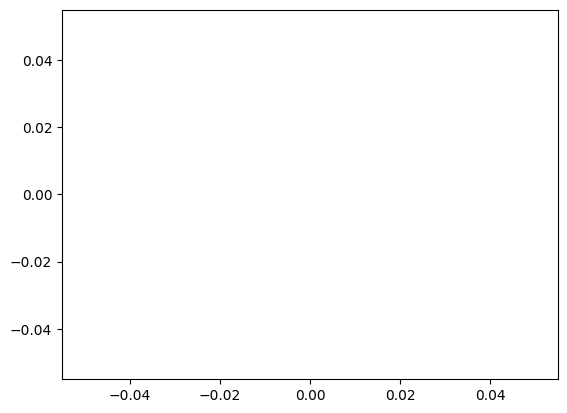

In [65]:
# an empty plot
plt.plot()

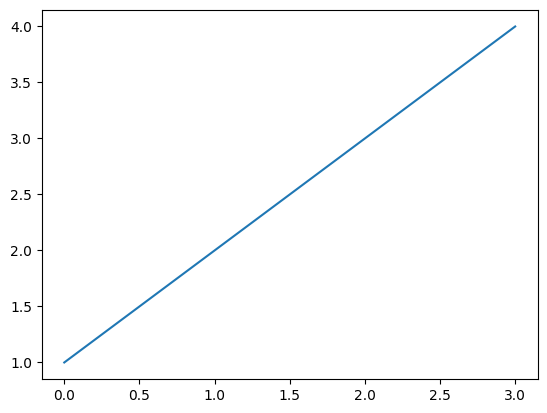

In [66]:
# plotting a list
plt.plot([1, 2, 3, 4])

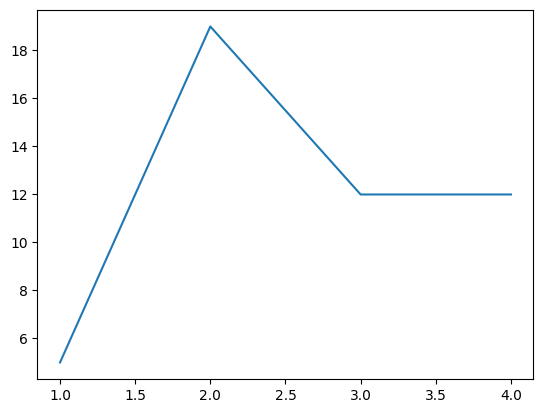

In [67]:
# plotting two lists against eachother
x = [1, 2, 3, 4]
y = [5, 19, 12, 12]
fig, ax = plt.subplots()
ax.plot(x, y)

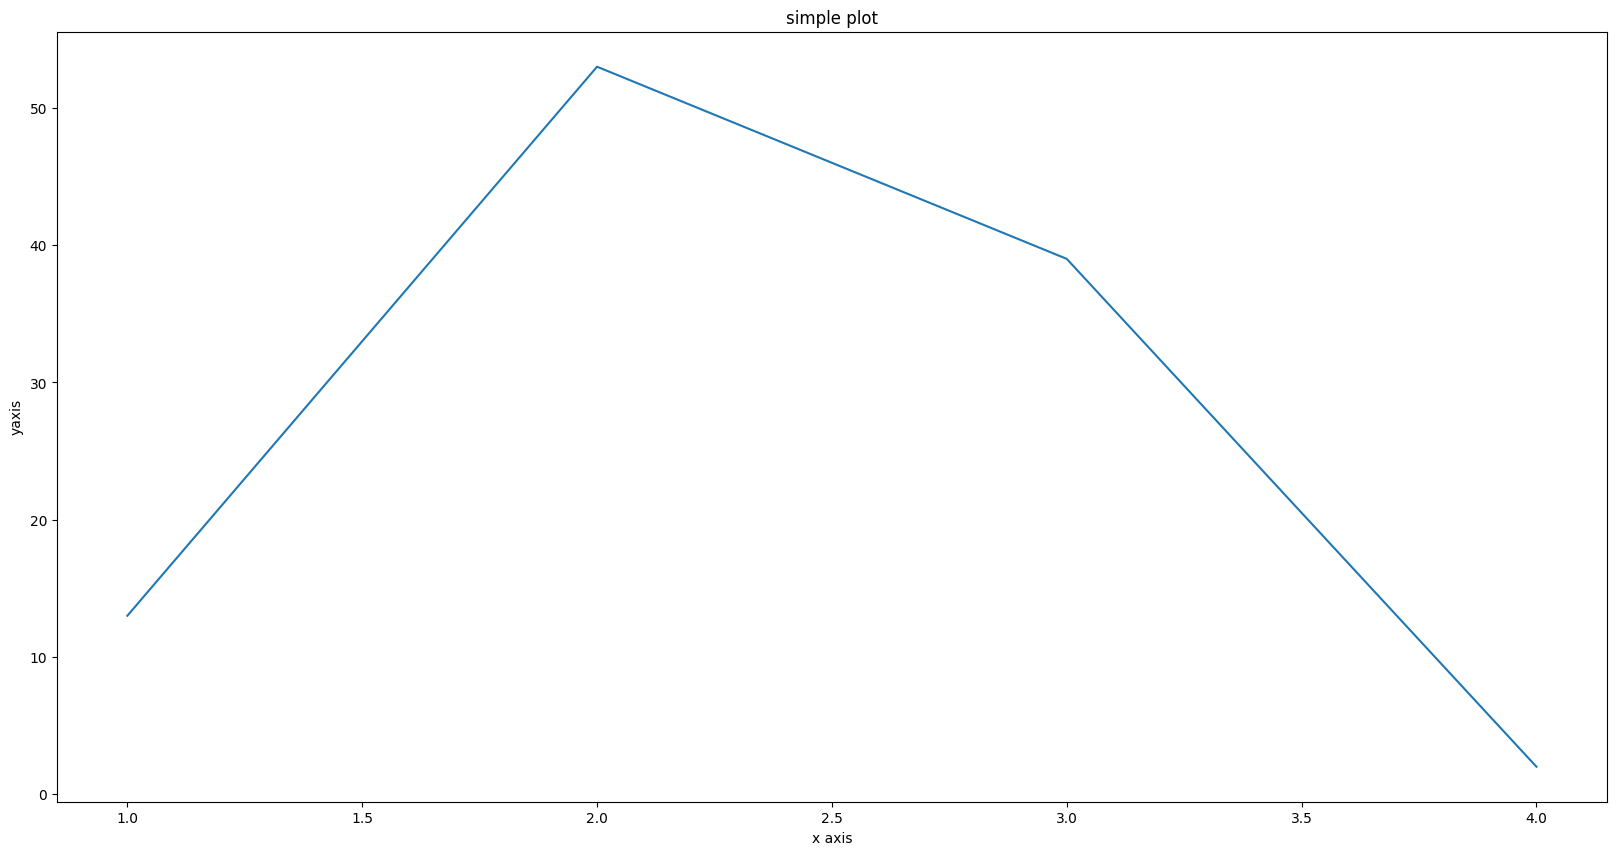

In [68]:
# a more professional looking plot, with saving to png!
# 1. prepare data
x = [1, 2, 3, 4]
y = [13, 53, 39, 2]

# 2. setup plot
fig, ax = plt.subplots(figsize=(20,10))

# 3. plotting data
ax.plot(x, y)

# 4. customize plot
ax.set(title="simple plot", xlabel="x axis", ylabel="yaxis")

# 5. save and show figure
fig.savefig('sample-plot.png')

## Working with DataFrames

<Axes: xlabel='year', ylabel='stocks'>

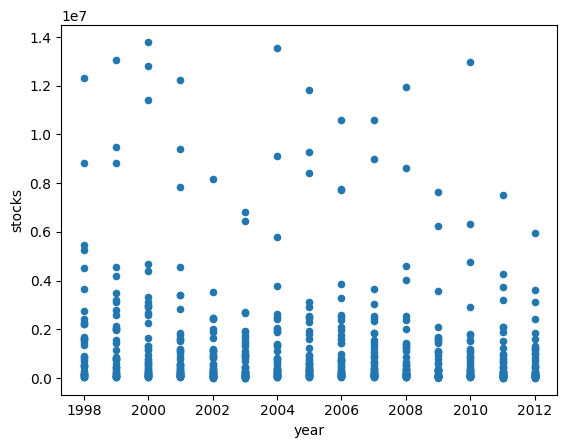

In [75]:
# it's very easy to use .plot() on a DataFrame.
honey_df.plot(x='year', y='stocks', kind='scatter')

<Axes: xlabel='year', ylabel='numcol'>

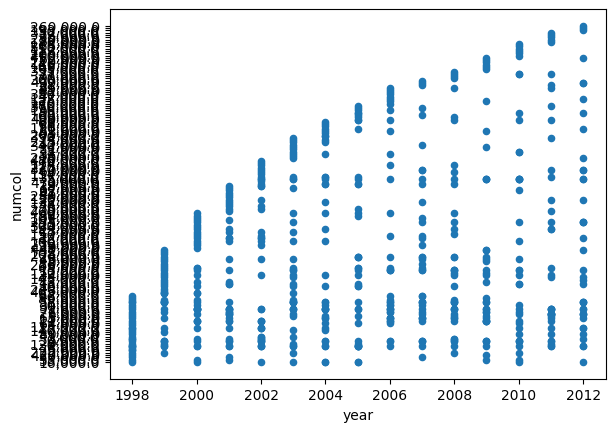

In [84]:
#TODO plot your own scatter plot on honey_df:
honey_df.plot(x='year',y='numcol',kind='scatter')
#  not sure why all the numbers look like they're being blurred out? 

## Seaborn
We can use seaborn for prettier graphics

In [85]:
import seaborn as sns

<Axes: xlabel='year', ylabel='stocks'>

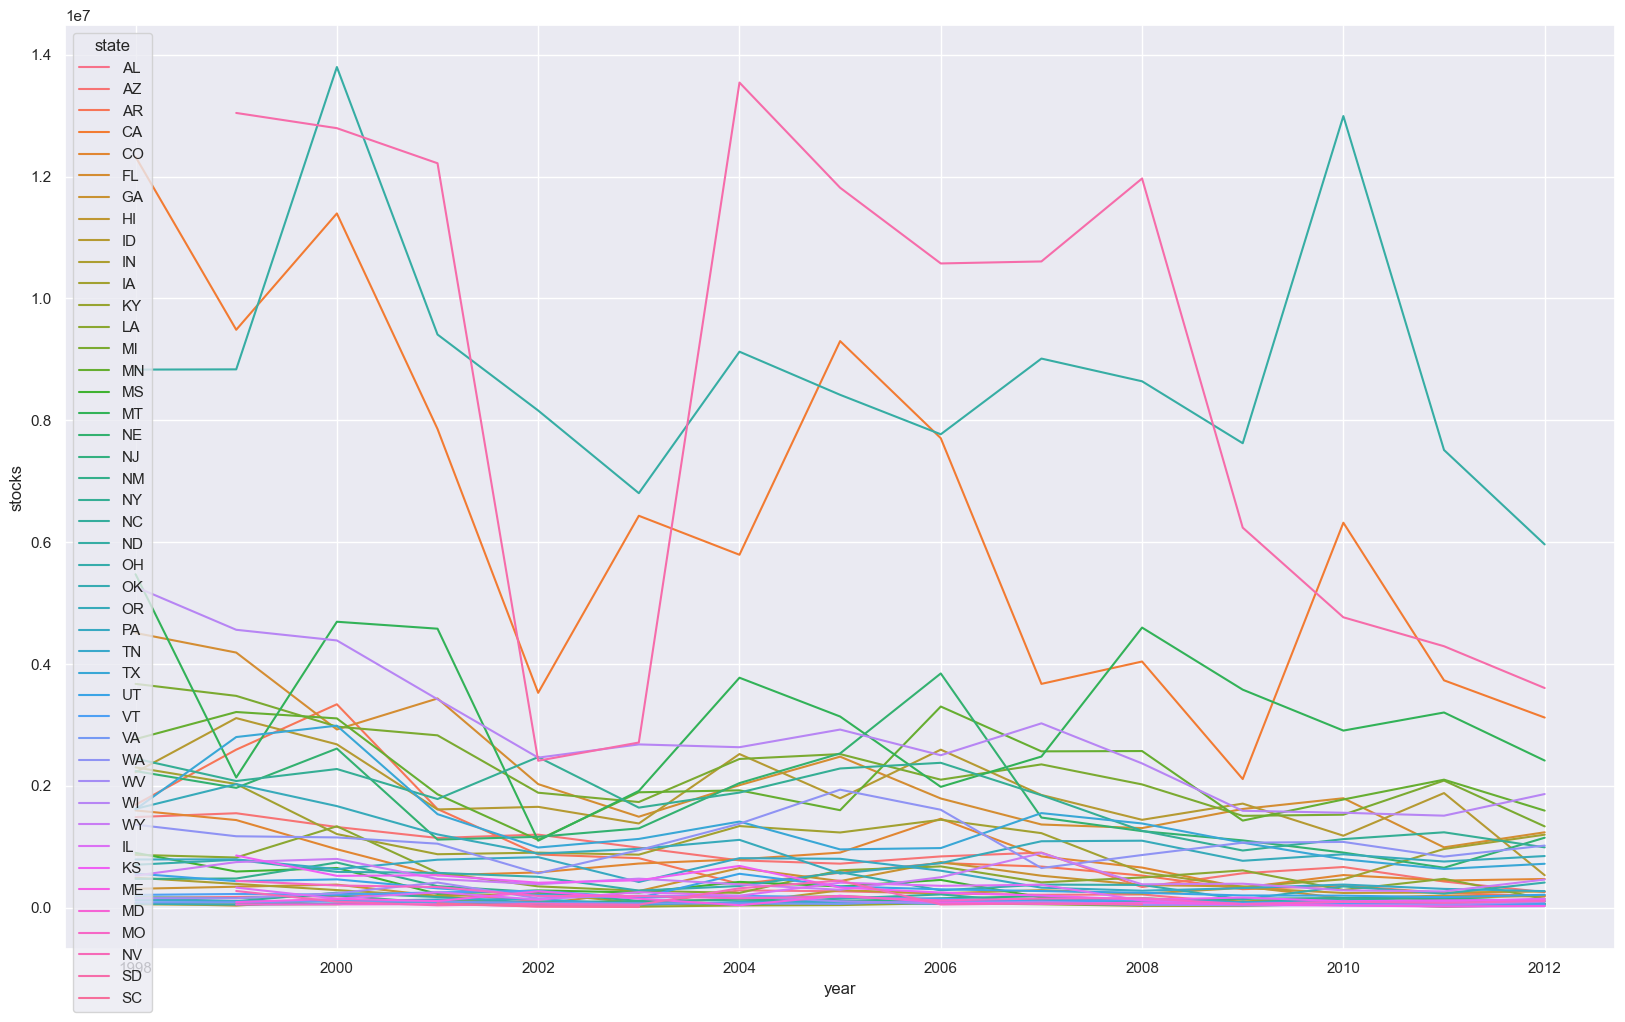

In [86]:
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.lineplot(data=honey_df, x='year', y='stocks', hue='state')

Notice here that we need to pass in the data to `.lineplot()`

What happens if we want a scatterplot against all columns?

In [ ]:
sns.pairplot(data=honey_df)

<Axes: xlabel='year', ylabel='stocks'>

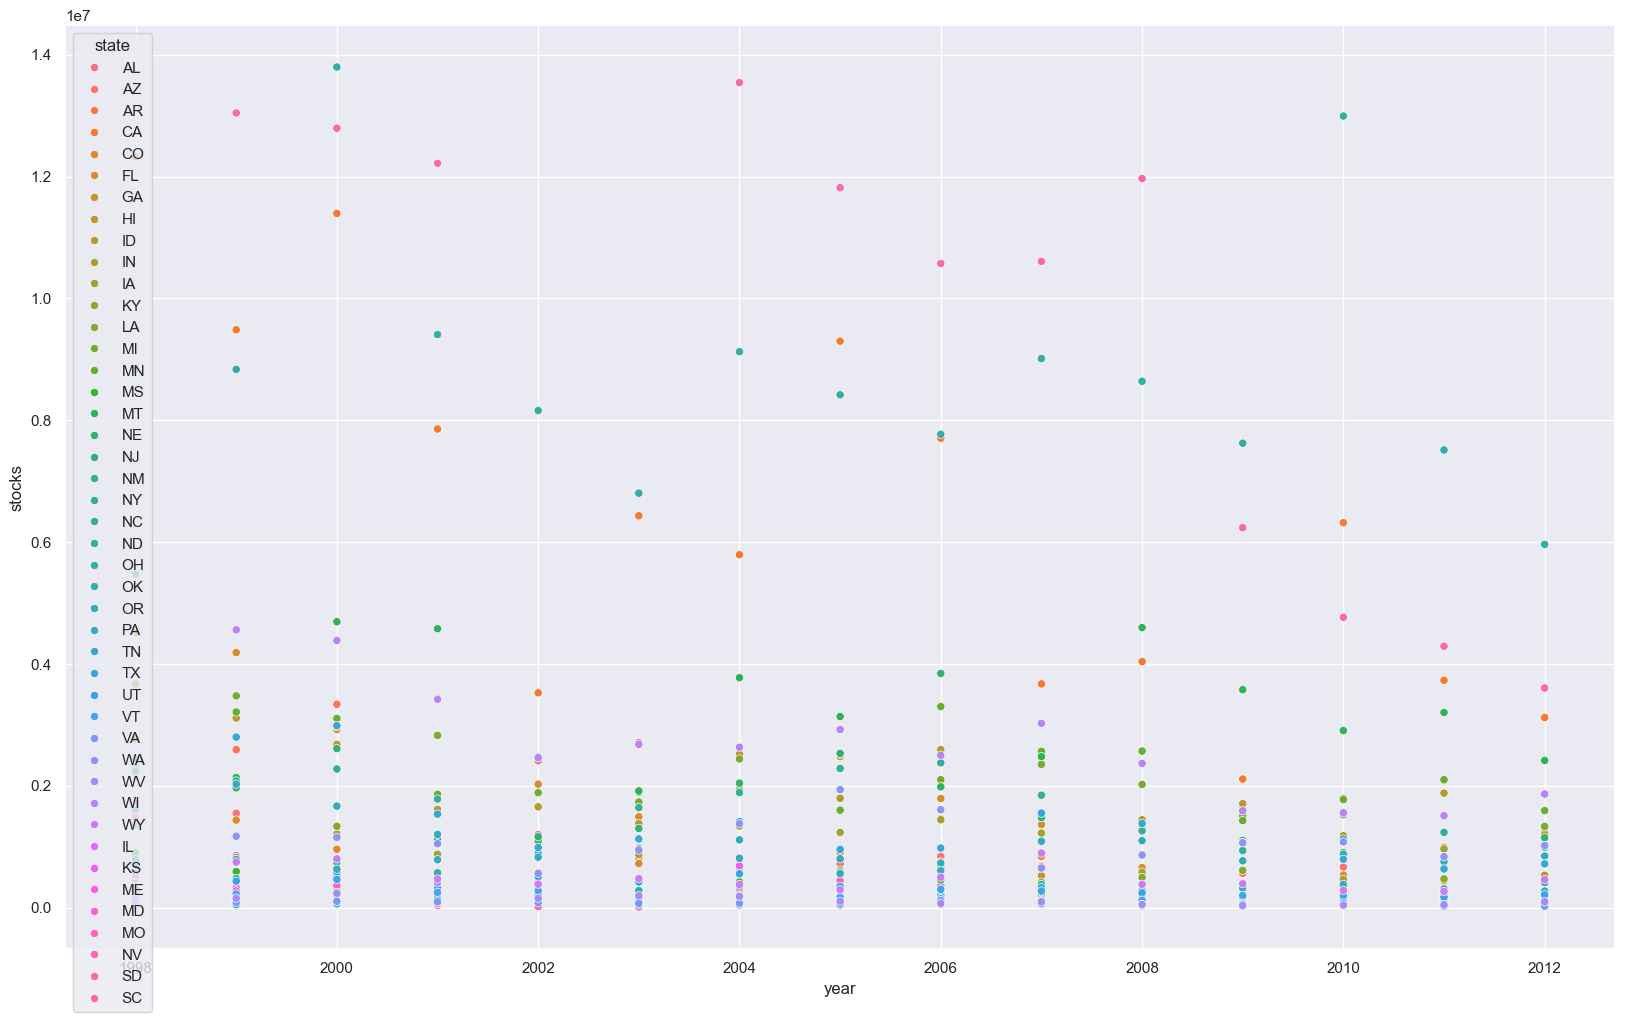

In [87]:
#TODO: Change this line plot to a scatter plot. (HINT: Change sns.lineplot)
sns.set(rc={"figure.figsize":(20,12)}) # change the figure size to width=20, height=12
sns.scatterplot(data=honey_df, x='year', y='stocks', hue='state')